In [1]:
# data preprocessing
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
import re
# wordcloud & other visualizations
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image
from collections import Counter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# substring for the chart titles
SUBTITLE = 'Ep. 1-200 (174 eps.)'

df1 = pd.read_csv('datasets\hologra_comments_part_1.csv')
df2 = pd.read_csv('datasets\hologra_comments_part_2.csv')
df3 = pd.read_csv('datasets\hologra_comments_part_3.csv')
df4 = pd.read_csv('datasets\hologra_comments_part_4.csv')
df = pd.concat([df1, df2, df3, df4], axis=0)
df.head()

,comment
0,あやめのけつやないかーい
1,ケツやないかーい
2,フォントw
3,1:01自分用
4,1:01


In [3]:
# add more stopwords
stopwords_2 = set()
for word in STOPWORDS:
    if word.find('\'') != -1:
        stopwords_2.add(word.replace("'", '')) # wouldnt, wont, arent, didnt,...
        s = re.findall(".*(?=')", word)[0]
        if len(s) > 2 and s not in STOPWORDS:
            stopwords_2.add(s) # wouldn, won, aren, didn,...

stopwords_2.update(['tho', 'though', 'although'])
custom_sw = STOPWORDS.union(stopwords_2)

lemmatizer = WordNetLemmatizer()
length = len(df)
progress = 0

def preprocess(text):
    global progress
    progress += 1
    print(f'{progress / length * 100:.2f}%\t{progress}/{length}', end='\r')
    '''
    - transform to lowercase
    - remove all characters except whitespaces and latin characters
    - only accept words more than 2 characters long
    - word tokenization
    - lemmatization
    - remove duplicate words
    '''
    latin_chars = re.sub(r'[^a-z ]+', '', str(text).lower())
    tokenized = word_tokenize(latin_chars)
    removed_stopwords = [word for word in tokenized if word not in custom_sw]
    lemmatized = [lemmatizer.lemmatize(word) for word in removed_stopwords]
    min_char = [word for word in lemmatized if len(word) > 2]
    removed_dupe_words = set(min_char)
    output = ' '.join(removed_dupe_words)
    return output

df['cleaned'] = df['comment'].apply(preprocess)
df.head()

,comment,cleaned
0,あやめのけつやないかーい,
1,ケツやないかーい,
2,フォントw,
3,1:01自分用,
4,1:01,


In [4]:
# remove empty and duplicate rows
df = df.replace('', float('NaN')).dropna().drop_duplicates(subset='cleaned')
print(len(df))
df.head()

224650


,comment,cleaned
8,How to be saved and be right with God for eter...,short godbelieve savedmore link scripturejohn ...
15,Last time on hololive! The office blew up for ...,last time hololive blew already office
19,0:51 og yamada,yamada
27,最後の最後でmsgsは草,msg
35,Love live reference,live love reference


In [5]:
final_string = ''
for i in range(len(df)):
    final_string += df['cleaned'].values[i] + ' '
    
print(f'String length: {len(final_string):,}')
print(f'Word amount: {len(final_string.split()):,}')

String length: 8,609,766
Word amount: 1,262,877


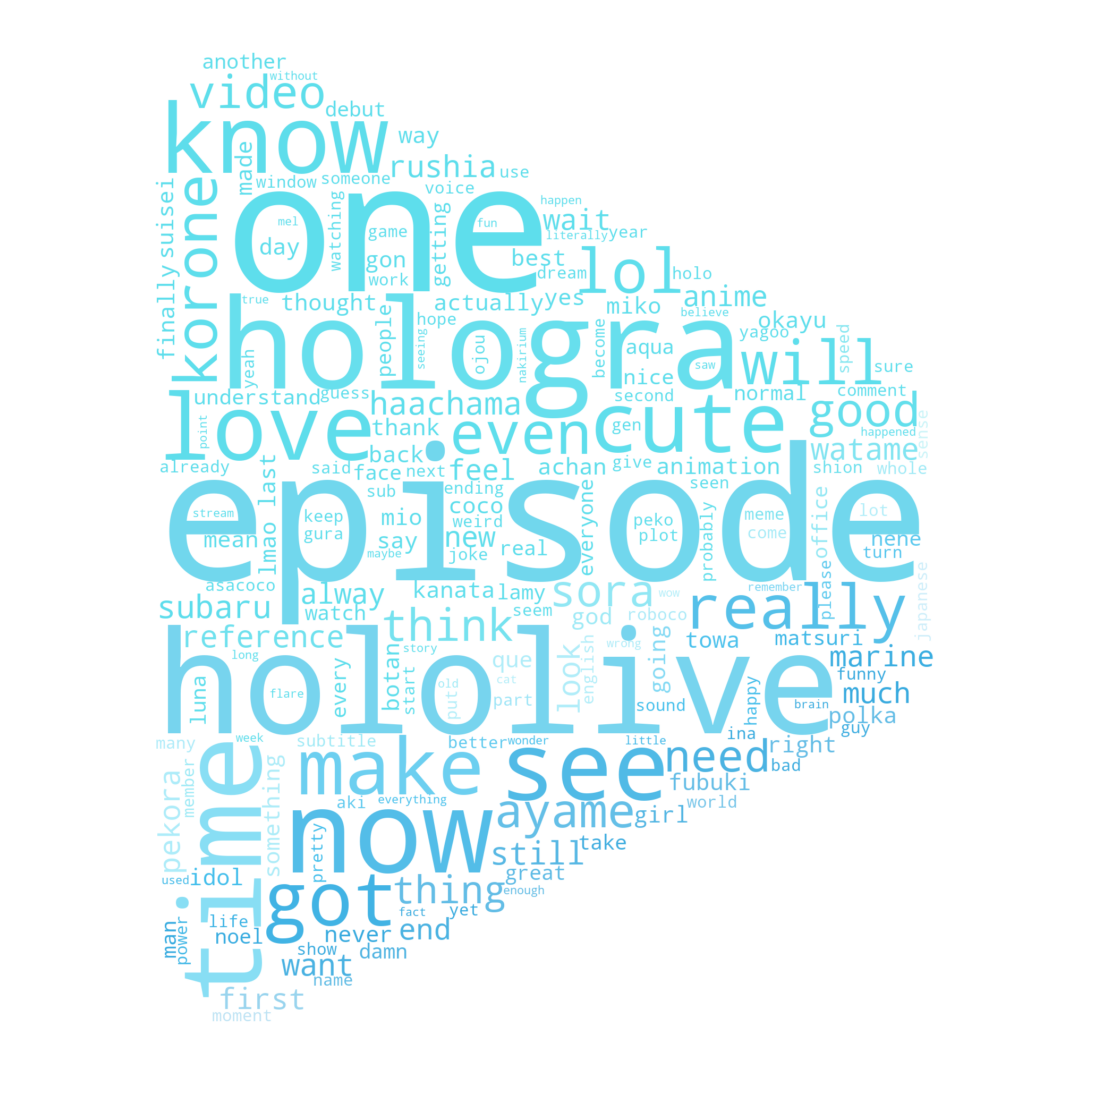

In [6]:
# generate word cloud image
mask = np.array(Image.open('assets/Hololive_logo.png')) # bg must be white
wc = WordCloud(
    mask=mask,
    width=mask.shape[1],
    height=mask.shape[0],
    background_color='white',
    random_state=42,
    collocations=False
    ).generate(final_string)
# color texts similar to mask image's colors
image_colors = ImageColorGenerator(mask)
# display image
plt.figure(figsize=[20,20])
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.savefig('visuals/word_cloud.png', transparent=False, dpi=300) # lower dpi if not enough memory
plt.show()

In [7]:
counter = Counter(final_string.split())
top_words_3000 = np.array(counter.most_common(3000)).transpose()
top_words_10 = np.array(counter.most_common(10)).transpose()

plt.rc('font', size=10)         # default text sizes
plt.rc('axes', titlesize=20)    # axes title
plt.rc('axes', labelsize=16)    # x and y labels
plt.rc('xtick', labelsize=10)   # tick labels
plt.rc('ytick', labelsize=10)   # tick labels
plt.rc('legend', fontsize=10)   # legend fontsize
plt.rc('figure', titlesize=32)  # figure title

def add_labels(x, y, offset):
    print(x, y)
    for i in range(len(x)):
        plt.text(i, y[i] - offset, y[i], ha='center')

['episode' 'one' 'hololive' 'hologra' 'now' 'time' 'know' 'see' 'love'
 'cute'] [9838, 9686, 8564, 7377, 6528, 6091, 6009, 5930, 5461, 5157]


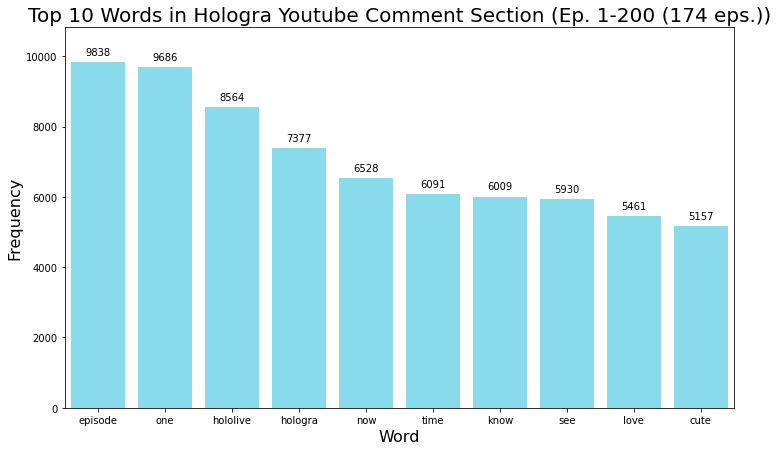

In [8]:
# top 10 words in word cloud
freq_10 = [int(i) for i in top_words_10[1]]
word_10 = top_words_10[0]

plt.figure(figsize=(12,7))
plt.margins(0.01, 0.1)
plt.bar(word_10, freq_10, color='#89dbeb')
add_labels(word_10, freq_10, -200)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title(f'Top 10 Words in Hologra Youtube Comment Section ({SUBTITLE})')
plt.savefig('visuals/hologra_top_10_words.png', transparent=False)
plt.show()

['korone' 'ayame' 'sora' 'haachama' 'subaru' 'marine' 'watame' 'rushia'
 'pekora' 'coco' 'fubuki' 'polka' 'towa' 'kanata' 'okayu' 'achan' 'luna'
 'miko' 'mio' 'suisei' 'botan' 'aqua' 'nene' 'noel' 'matsuri' 'lamy'
 'shion' 'yagoo' 'aki' 'gura' 'flare' 'roboco' 'ina' 'mel' 'azki' 'choco'
 'moona' 'lui' 'iroha' 'kiara' 'laplus' 'risu' 'chloe' 'iofi' 'koyori'
 'ame'] [4132, 3762, 3406, 3270, 3221, 3187, 3085, 3062, 2661, 2602, 2399, 2394, 2356, 2272, 2269, 2199, 2116, 2090, 2025, 1985, 1969, 1946, 1914, 1862, 1805, 1648, 1595, 1416, 1221, 1152, 1088, 1076, 1004, 1003, 942, 864, 725, 546, 508, 481, 472, 460, 451, 352, 350, 251]


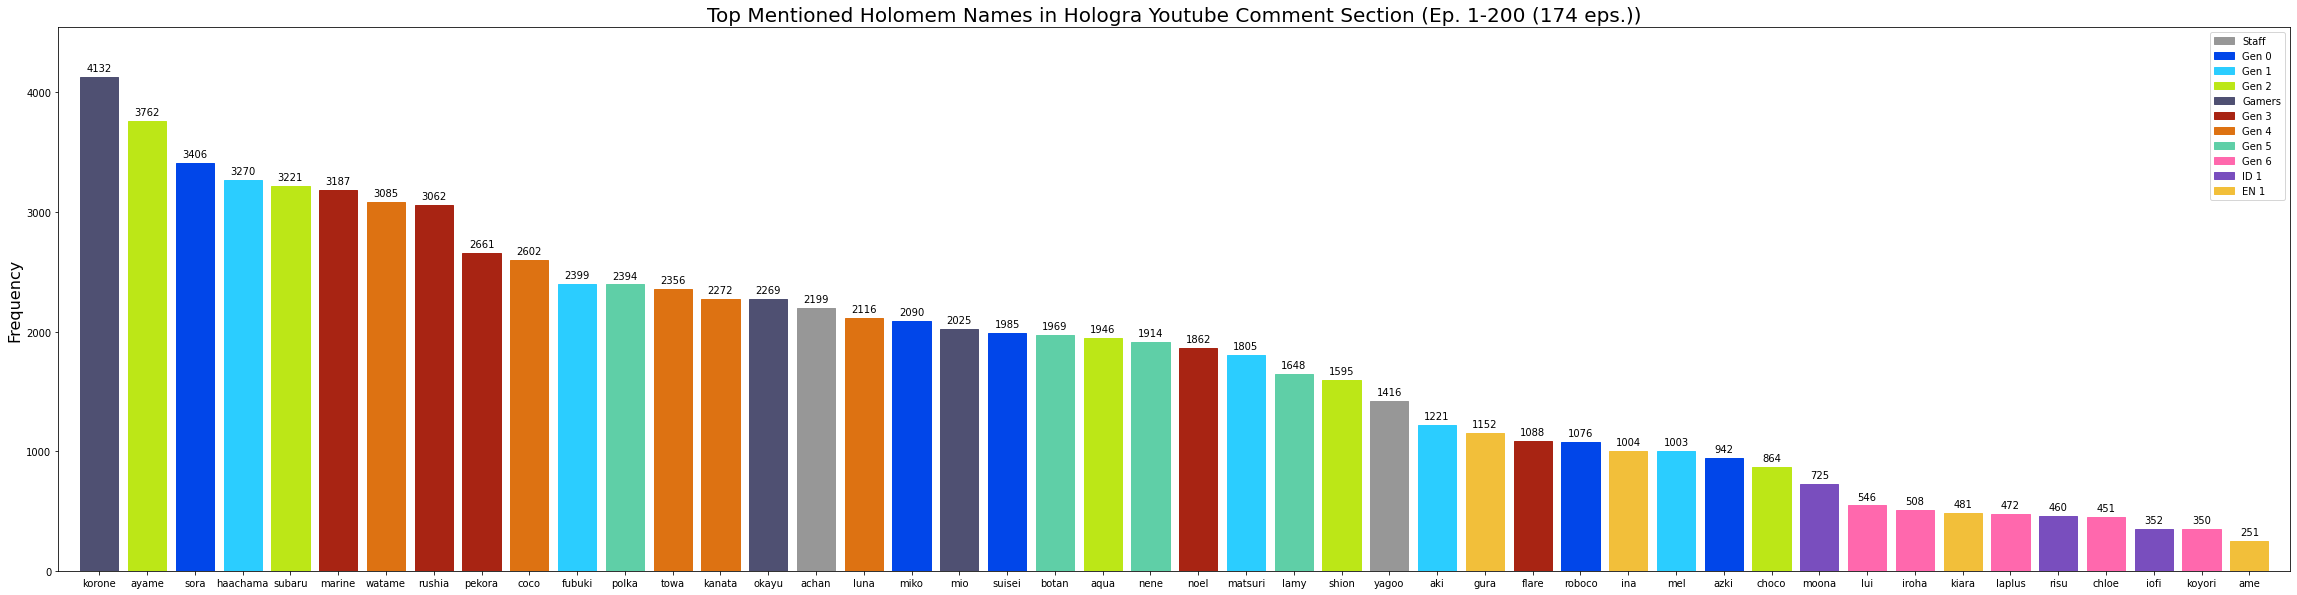

In [9]:
# top holomem names within top 200
holomems = ['achan', 'yagoo',
            'sora', 'roboco', 'miko', 'suisei', 'azki',
            'mel', 'fubuki', 'matsuri', 'haachama', 'aki',
            'aqua', 'shion', 'ayame', 'choco', 'subaru',
            'mio', 'okayu', 'korone',
            'pekora', 'rushia', 'flare', 'noel', 'marine',
            'kanata', 'coco', 'watame', 'towa', 'luna',
            'nene', 'polka', 'botan', 'lamy',
            'laplus', 'lui', 'koyori', 'chloe', 'iroha',
            'risu', 'moona', 'iofi',
            'calli', 'kiara', 'ina', 'gura', 'ame']
            
index = [i for i in range(len(top_words_3000[0])) if top_words_3000[0][i] not in holomems]
holomems = np.delete(top_words_3000[0], index)
holomem_freq = np.delete(top_words_3000[1], index)
holomem_freq = [int(i) for i in holomem_freq]

plt.figure(figsize=(40,10))
plt.margins(0.01, 0.1)
holomem_top_mentioned = plt.bar(holomems, holomem_freq, color='#89dbeb')

# color bars by gen
STAFF_COLOR = '#979797'
GEN_0_COLOR = '#0146E9'
GEN_1_COLOR = '#2BCDFF'
GEN_2_COLOR = '#BCE717'
GAMER_COLOR = '#4F5072'
GEN_3_COLOR = '#A82413'
GEN_4_COLOR = '#DD7212'
GEN_5_COLOR = '#5FCFA7'
GEN_6_COLOR = '#FF68AD'
ID_1_COLOR = '#794EBE'
EN_1_COLOR = '#F2BF3A'

for i in range(len(holomems)):
    if holomems[i] in ['sora', 'roboco', 'miko', 'suisei', 'azki']:
        holomem_top_mentioned[i].set_color(GEN_0_COLOR)
    elif holomems[i] in ['mel', 'fubuki', 'matsuri', 'haachama', 'aki']:
        holomem_top_mentioned[i].set_color(GEN_1_COLOR)
    elif holomems[i] in ['aqua', 'shion', 'ayame', 'choco', 'subaru']:
        holomem_top_mentioned[i].set_color(GEN_2_COLOR)
    elif holomems[i] in ['mio', 'okayu', 'korone']:
        holomem_top_mentioned[i].set_color(GAMER_COLOR)
    elif holomems[i] in [ 'pekora', 'rushia', 'flare', 'noel', 'marine']:
        holomem_top_mentioned[i].set_color(GEN_3_COLOR)
    elif holomems[i] in ['kanata', 'coco', 'watame', 'towa', 'luna']:
        holomem_top_mentioned[i].set_color(GEN_4_COLOR)
    elif holomems[i] in ['nene', 'polka', 'botan', 'lamy']:
        holomem_top_mentioned[i].set_color(GEN_5_COLOR)
    elif holomems[i] in ['laplus', 'lui', 'koyori', 'chloe', 'iroha']:
        holomem_top_mentioned[i].set_color(GEN_6_COLOR)
    elif holomems[i] in ['risu', 'moona', 'iofi']:
        holomem_top_mentioned[i].set_color(ID_1_COLOR)
    elif holomems[i] in ['calli', 'kiara', 'ina', 'gura', 'ame']:
        holomem_top_mentioned[i].set_color(EN_1_COLOR)
    elif holomems[i] in ['achan', 'yagoo']:
        holomem_top_mentioned[i].set_color(STAFF_COLOR)

# legend
STAFF = mpatches.Patch(color=STAFF_COLOR, label='Staff')
GEN_0 = mpatches.Patch(color=GEN_0_COLOR, label='Gen 0')
GEN_1 = mpatches.Patch(color=GEN_1_COLOR, label='Gen 1')
GEN_2 = mpatches.Patch(color=GEN_2_COLOR, label='Gen 2')
GAMER = mpatches.Patch(color=GAMER_COLOR, label='Gamers')
GEN_3 = mpatches.Patch(color=GEN_3_COLOR, label='Gen 3')
GEN_4 = mpatches.Patch(color=GEN_4_COLOR, label='Gen 4')
GEN_5 = mpatches.Patch(color=GEN_5_COLOR, label='Gen 5')
GEN_6 = mpatches.Patch(color=GEN_6_COLOR, label='Gen 6')
ID_1 = mpatches.Patch(color=ID_1_COLOR, label='ID 1')
EN_1 = mpatches.Patch(color=EN_1_COLOR, label='EN 1')
plt.legend(handles=[STAFF, GEN_0, GEN_1, GEN_2, GAMER, GEN_3, GEN_4, GEN_5, GEN_6, ID_1, EN_1], loc=1)

# labels and title
add_labels(holomems, holomem_freq, -50)
plt.ylabel('Frequency')
plt.title(f'Top Mentioned Holomem Names in Hologra Youtube Comment Section ({SUBTITLE})')
plt.savefig('visuals/holomem_top_mentioned.png', transparent=False)
plt.show()

In [10]:
# remove old content
with open('holomem_hologra.md', 'r') as file:
    prev_line = False
    lines = []
    for line in file:
        if not prev_line:
            lines.append(line)
        if '#### Word Cloud Full List (Top 200)' in line:
           prev_line = True

with open('holomem_hologra.md', 'w') as file:
    for line in lines:
        file.write(line)

# write new content
most_common_200 = counter.most_common(200)
list_200 = ''
for i in range(len(most_common_200)):
    list_200 += f'\n{i + 1}) {most_common_200[i][0]} ({most_common_200[i][1]})'

with open('holomem_hologra.md', 'a') as file:
    file.write(list_200)
    file.close()